In [1]:
#importing the requests library
import requests
import pandas as pd
import json
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
import yfinance as yf #using the yahoo finance library 
from yahoofinancials import YahooFinancials
import warnings
warnings.filterwarnings('ignore')

Getting stock data using the open source yahoo finance library. More information can be found [here](https://pypi.org/project/yfinance/)

In [2]:
#function to get stock data of a company


def stock_info(ticker):
    #define dates for 5 years
    start_date = '2017-01-01'
    end_date = '2022-12-31'
    df = yf.download(ticker,start=start_date,end=end_date)
    #plot the stock price over the years
    fig,ax=plt.subplots(figsize=(12,8));
    df['Adj Close'].plot(ax=ax);
    ax.set_title(f'Stock price of {ticker} from 2017 to 2022');
    plt.show()
   
    return fig,ax

In [3]:
#function to calculate stock return

def stock_return(ticker):
    start_date = '2017-01-01'
    end_date = '2022-12-31'
    df = yf.download(ticker,start=start_date,end=end_date)
    df_return = df[['Adj Close']]
    df_return['pct_change'] = df_return['Adj Close'].pct_change() # use pct change to calculate the diff 
    df_return.drop(df_return.index[0],inplace=True) # drop the Nan value from the first row
    
    #plot the returns over 5 years
    fig,ax = plt.subplots(figsize=(15,8))
    ax.plot(df_return['pct_change'])
    ax.set_title('Stock Return Pct from 2017 to 2022:' +' ' + ticker)
    plt.show();
    
    return fig,ax
      

In [4]:
#function to calculate beta value of stock

def calculate_beta(ticker):
    
    #get data for ticker and SPY whih serves as the market index
    symbols = [ticker,'SPY']
    data = yf.download(symbols, start = '2019-01-01',end = '2022-12-31')['Adj Close']
    price_change = data.pct_change()
    price_change.drop(price_change.index[0],inplace=True)
    
    #reshape for linear regression
    X = np.array(price_change[ticker]).reshape((-1,1))
    y = np.array(price_change['SPY'])

    #create splits
    X_train,X_test,y_train,y_test = train_test_split(X,y)
    lr = LinearRegression()
    lr.fit(X_train,y_train)

    #predictions
    y_preds = lr.predict(X_test)

    #plot 
    fig,ax = plt.subplots(figsize=(12,7));
    ax.plot(X_test,y_preds,linestyle=':',color='orange')
    ax.scatter(y_test,y_preds,alpha=0.5)
    ax.set_title(f' Beta value = {lr.coef_}')
    ax.set_xlabel('Market Index:SPY')
    ax.set_ylabel(f'{ticker} value')
    plt.show();
    
    return fig,ax

In [5]:
#function to get historical PE ratios

def get_pe_ratio(ticker):
    
    #get financial statement of ticker using yahoofinancials
    financials = YahooFinancials(ticker)
    statement = financials.get_financial_stmts('annual', 'income', reformat=True)    
    
    #create a dict of the income statement alone
    dicts ={}
    for i in statement['incomeStatementHistory'][ticker]:
        dicts.update(i)
    
    #create a dataframe for easy use
    df = pd.DataFrame(dicts)
    df = df.T
    df['dilutedAverageShares'].fillna(df['dilutedAverageShares'].median(),inplace=True)
    
    #calculate pe ratio
    eps = df['netIncomeContinuousOperations']/df['dilutedAverageShares'] #calc earnings per share
    eps_df = pd.DataFrame(eps,index=df.index,columns=['EPS'])
    eps_df['PE ratio'] = financials.get_current_price()/eps_df['EPS']#get current price and calc pe ratio
    
    #plot result
    fig,ax=plt.subplots(figsize=(8,8));
    ax.plot(eps_df['PE ratio'],marker = '*', markerfacecolor = 'yellow')
    ax.set_title(f'Historical PE ratio: {ticker}')
    ax.set_ylabel('PE ratio')
    plt.show()
    
    return fig,ax

## stock evaluation

3. p/b ratio
4. div yield

[*********************100%***********************]  1 of 1 completed


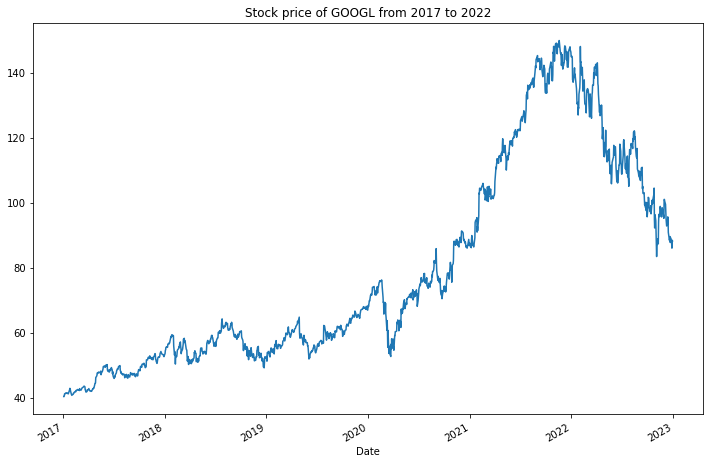

(<Figure size 864x576 with 1 Axes>,
 <AxesSubplot:title={'center':'Stock price of GOOGL from 2017 to 2022'}, xlabel='Date'>)

In [6]:
stock_info('GOOGL')

[*********************100%***********************]  1 of 1 completed


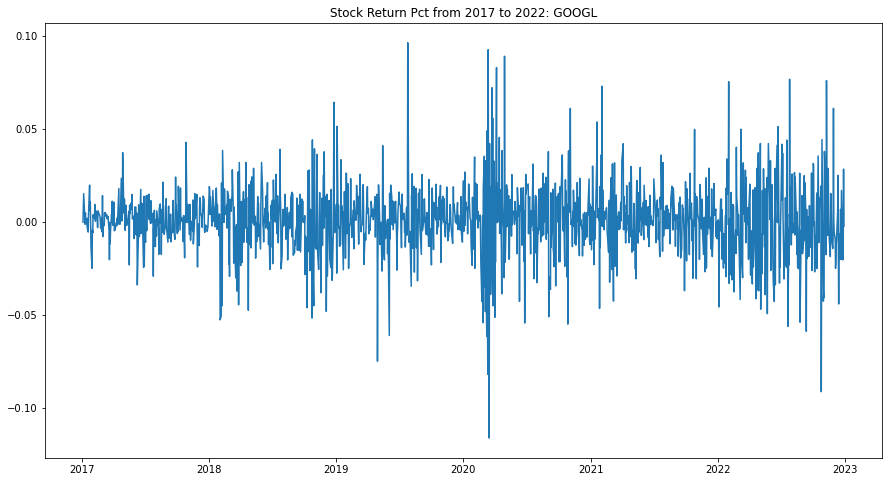

(<Figure size 1080x576 with 1 Axes>,
 <AxesSubplot:title={'center':'Stock Return Pct from 2017 to 2022: GOOGL'}>)

In [7]:
stock_return('GOOGL')

[*********************100%***********************]  2 of 2 completed


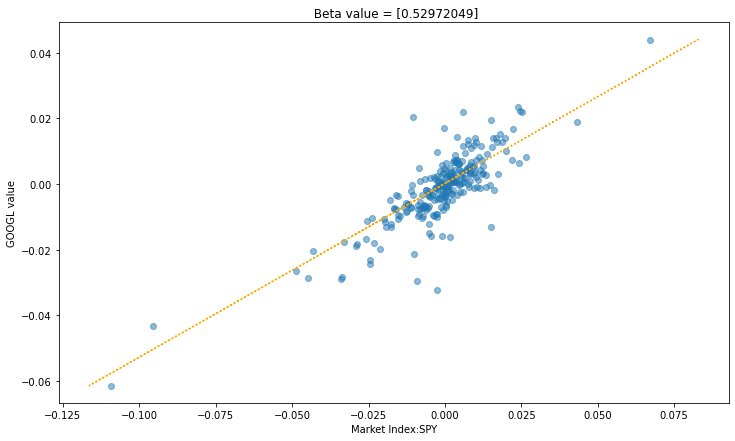

(<Figure size 864x504 with 1 Axes>,
 <AxesSubplot:title={'center':' Beta value = [0.52972049]'}, xlabel='Market Index:SPY', ylabel='GOOGL value'>)

In [8]:
calculate_beta('GOOGL')

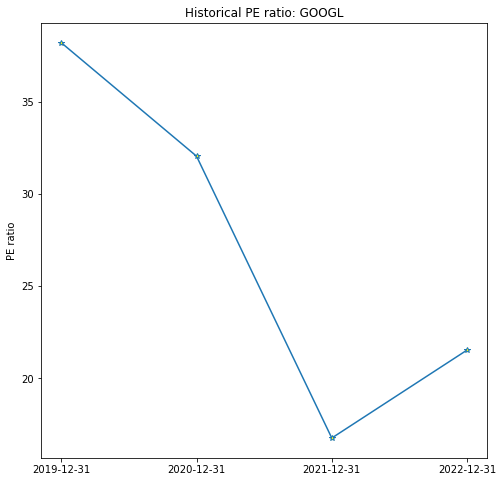

(<Figure size 576x576 with 1 Axes>,
 <AxesSubplot:title={'center':'Historical PE ratio: GOOGL'}, ylabel='PE ratio'>)

In [9]:
get_pe_ratio('GOOGL')